A web-based, interactive computing tool for capturing the whole computation process: developing, documenting, and executing code, as well as communicating the results.
- Ctrl-Enter: run cell in-place
- Shift-Enter: run cell
- Alt-Enter: run cell, insert below

Indentation matters!

Capitalization is important!

In [1]:
# Here I am printing
print(5)
print(1+1)

5
2


## Variables
When declaring a variable, capitalization is important!

In [2]:
Five = 5
one = 1
twodot = 2.0
print (Five)
print (one + one)
message = "This is a string"
print (message)

5
2
This is a string


In [3]:
print (type(one))

<class 'int'>


In [4]:
print (type(twodot))

<class 'float'>


In [5]:
print("hello" + "world")
print("number" * 5)

helloworld
numbernumbernumbernumbernumber


In [6]:
print("some" + 1)

TypeError: can only concatenate str (not "int") to str

In [ ]:
year="2020"
print(int(year)+1)

## Arithmetic Operations

Addition +

Subtraction -

Division /

Modulo %

Multiplication *

Floor division //

The power of **

In [ ]:
print(5%2)
print(5/2)
print(5//2)
print(2**3)

## Reading from the Keyboard

In [ ]:
numIn = input("Please enter a number: ")

In [ ]:
print ("The number that you wrote was : ", numIn)
print ("The number that you wrote was : %d" % numIn)

In [ ]:
nameIn = input("Please enter your name: ")
print ("Hello %s, you entered the number %s" % (nameIn,numIn))

## Writing and Reading Files
When opening a file, you need to decide “how” you want to open it: Just read? Are you going to write to the file? If the file already exists, what do you want to do with it?

- r: read only (default)
- w: write mode, file will be overwritten if it already exists
- a: append mode, data will be appended to the existing file

In [ ]:
my_file = open("output_file.txt",'w')
var1 = "This is a string"
var2 = 10
my_file.write(var1)
my_file.write("\n")
my_file.write(str(var2))
my_file.close()

In [ ]:
my_file = open("output_file.txt",'r')
content = my_file.read()
print(content)
my_file.close()

In [ ]:
my_file = open("output_file.txt",'r')
var1 = my_file.readline()
var2 = my_file.readline()
print("String: ", var1)
print("Integer: ", var2)
my_file.close()

## if/else/elif
Indentation matters!

In [ ]:
a=2
b=5
print("Is a bigger than b?", a>b)
print("Is a smaller than b?", a<b)
print("Is a equal to b?", a == b)
print("Is a different from b?", a != b)
print("Is a different from b or bigger than b?", a != b or a>b)
print("Is a different from b and bigger than b?", a != b and a>b)

In [ ]:
if a>b:
    print("a is bigger than b")
elif a<b:
    print("a is smaller than b")
else:
    print("a is equal to b")

In [ ]:
if a>b:
    print("a is bigger than b")
elif a<b:
    print("a is smaller than b")
    if a>0:
        print("a is positive")
else:
    print("a is equal to b")

## Exercise
- enter a integer number from the keyboard into a variable.
- using type casting and if statements, determine if the number is even or odd

## Loops
Indentation is IMPORTANT!

In [ ]:
for x in range(0,3):
    print("x = %d" % x)

In [ ]:
for x in range(0,3):
    for y in range(0,3):
        print("(x,y) = (%d,%d)" % (x,y))

In [ ]:
i = 0
while(i < 10):
    print(i)
    i = i+1

# Exercise
Using a for/while loop, for $1\leq x\leq 5$ and $1\leq y\leq 5$, print when $x*y$ is even

## Lists

In [ ]:
mylist1 = ["first item", "second item"]
mylist2 = [1, 2, 3, 4]
mylist3 = ["first", "second", 3]
print(mylist1[0], mylist1[1])
print(mylist2[0])
print(mylist3)
print(type(mylist3))
print(type(mylist3[0]))
print(type(mylist3[2]))

In [ ]:
mylist3[1]=2.0
mylist3.append("LNCC")
for item in mylist3:
    print(item)

In [ ]:
print("Is 3 in mylist3?", 3 in mylist3)

## Tuple
A tuple is a collection which is ordered and unchangeable

In [7]:
mytuple = ("apple", "banana", 3)
for item in mytuple:
    print(item)

apple
banana
3


In [8]:
mytuple[1]=3

TypeError: 'tuple' object does not support item assignment

## User defined functions
User-defined functions are reusable code blocks; they only need to be written once, then they can be used multiple times.

In [9]:
def addNumbers(n1,n2,n3):
    sum123 = n1+n2+n3
    return sum123

In [10]:
total=addNumbers(2,4,5)
print(total)

11


# Exercise
Write a user defined function that accepts x and y and returns:
\begin{equation}
(x+y)^2
\end{equation}

## Anonymous Functions

In [11]:
x = lambda a: a*10
print(x(10))

100


In [12]:
def myfunc(x):
    return lambda a: a*x

In [13]:
y=myfunc(10)
print(y(5))

50


In [14]:
z=myfunc(100)
print(z(5))

500


## Defining the model
Let N be the number of tumor cells and assume that this number can increase with a growth rate of $r$ cells/hour until it reaches the environmental carrying capacity of $K$ cells. With these assumptions, the mathematical model is:
\begin{equation}
\frac{dN}{dt}=rN\left(1-\frac{N}{K}\right),
\end{equation}

- $r$: tumor growth rate;
- $K$: environmental carrying capacity;
- $\theta=(r,K)$

In [15]:
# Let y be the vector of outputs, t the time, and theta the vector of parameters
def control_tumor(y, t, theta):
    return theta[0] * y[0] * (1.0 - y[0] / theta[1])

In [16]:
import numpy as np
# Define time interval, parameter value, and initial condition
times = np.arange(0,50,0.5)
true_growth, true_ic, true_carry = 0.25, 1, 60
# Solving the ODE model
from scipy.integrate import odeint
sol = odeint(control_tumor, t=times, y0=true_ic, args=tuple([[true_growth,true_carry]]))

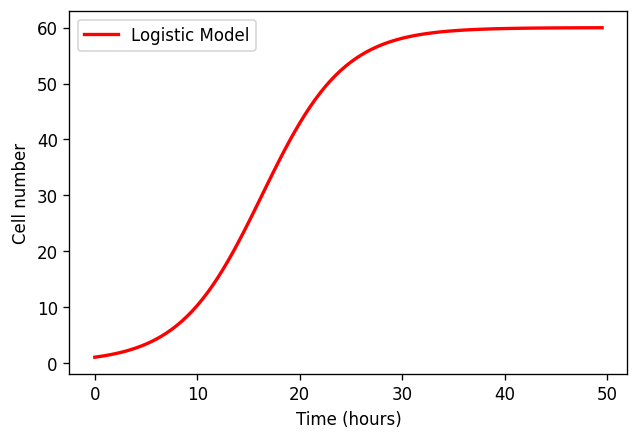

In [17]:
# Plotting the solution
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=120)
plt.plot(times, sol, label='Logistic Model', color='red',linewidth=2.0)
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Cell number');
#plt.savefig("just_data.pdf")
plt.show()

## Adding drug
Let C be the drug concentration (ng/mL) and assume that: it is being constantly delivered at a rate $a$, it naturally decays at a rate $b$, and it is consumed by the tumor by a rate $g$. The number of cells will decrease proportionally to the drug concentration at a rate $f$. With these assumptions, the mathematical model is:
\begin{align}
\frac{dN}{dt}&=rN\left(1-\frac{N}{K}\right)-fCN,\\
\frac{dC}{dt}&=a-bN-gCN.
\end{align}

- $r$: tumor growth rate;
- $K$: environmental carrying capacity;
- $f$: tumor death rate due to the drug
- $a$: drug delivery
- $b$: durg natural decay
- $g$: drug consumption rate
- $\theta=(r,K,f,a,b,g)$

In [18]:
#theta = (r,K,f,a,b,g)
def treated_tumor(y, t, theta):
    tumor=theta[0] * y[0] * (1.0 - y[0] / theta[1])-theta[2]*y[0]*y[1]
    drug=theta[3]-theta[4]*y[1]-theta[5]*y[0]*y[1]
    return [tumor,drug]

In [19]:
# Define time interval, parameter value, and initial condition
times = np.arange(0,50,0.5)
r = 0.25
K = 60
f = 0.1
a = 1.0
b = 0.1
g = 0.2
tumor_ic = 1
drug_ic = 0
# Solving the ODE model
y = odeint(treated_tumor, t=times, y0=[tumor_ic,drug_ic], args=tuple([[r,K,f,a,b,g]]))
sol = odeint(control_tumor, t=times, y0=tumor_ic, args=tuple([[r,K]]))

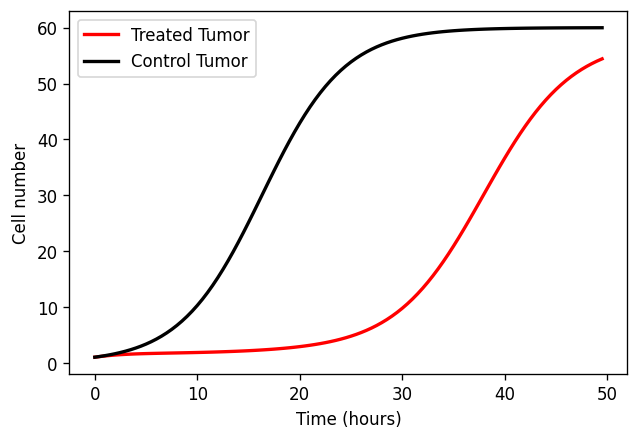

In [20]:
# Plotting the tumor solution
fig, ax = plt.subplots(dpi=120)
plt.plot(times, y[:,0], label='Treated Tumor', color='red',linewidth=2.0)
plt.plot(times, sol, label='Control Tumor', color='black',linewidth=2.0)
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Cell number');
#plt.savefig("just_data.pdf")
plt.show()

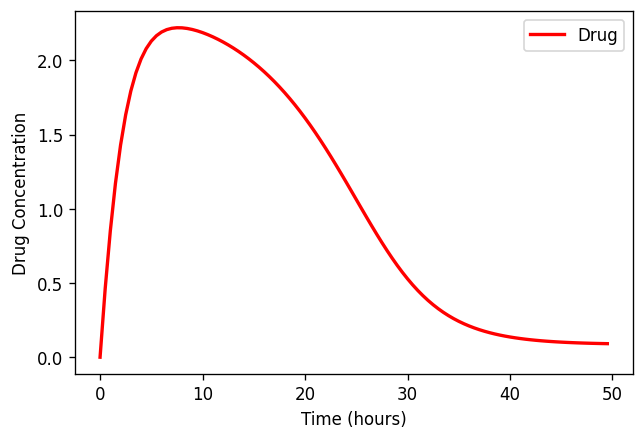

In [21]:
# Plotting the drug solution
fig, ax = plt.subplots(dpi=120)
plt.plot(times, y[:,1], label='Drug', color='red',linewidth=2.0)
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Drug Concentration');
#plt.savefig("just_data.pdf")
plt.show()

# Exercise
Let C be the drug concentration (ng/mL) and assume that: it is being constantly delivered at a rate $a$, it naturally decays at a rate $b$, and it is consumed by the tumor by a rate $g$. Let $D$ be the tumor cells that lost the hability to proliferate due to the drug at a rate $f$. With these assumptions, the mathematical model is:
\begin{align}
\frac{dN}{dt}&=rN\left(1-\frac{N+D}{K}\right)-fCN,\\
\frac{dC}{dt}&=a-bN-gCN-rCD,\\
\frac{dD}{dt}&=fCN.
\end{align}

- $r$: tumor growth rate;
- $K$: environmental carrying capacity;
- $f$: proliferation inhibition due to the drug
- $a$: drug delivery
- $b$: durg natural decay
- $g$: drug consumption rate